# Lista 3
-------------


Objetivo: agrupar conjunto de observações de um banco de dados.


Banco utilizado:


[Link](https://drive.google.com/file/d/1VMIUfwWfdeYRlABkqEppFT6f1sOj3q5B/view?usp=drive_link) para o banco


Descrição das variáveis:
> * gradyear: The graduation year of the high school student.
> * gender: The gender of the student (e.g., male or female).
> * age: The age of the student at the time of the survey.
> * NumberOffriends: The number of contacts or friends the student had on the social network.
> * basketball: The frequency or count of mentions of basketball in the student's profile.
> * football: The frequency or count of mentions of football in the student's profile.
> * soccer: The frequency or count of mentions of soccer in the student's profile.
> * softball: The frequency or count of mentions of softball in the student's profile.
> * volleyball: The frequency or count of mentions of volleyball in the student's profile.
> * swimming: The frequency or count of mentions of swimming in the student's profile.
> * cheerleading: The frequency or count of mentions of cheerleading in the student's profile.
> * baseball: The frequency or count of mentions of baseball in the student's profile.
> * tennis: The frequency or count of mentions of tennis in the student's profile.
> * sports: The overall frequency or count of mentions of sports in the student's profile.
> * cute: The frequency or count of mentions of cute in the student's profile.
> * sex: The frequency or count of mentions of sex in the student's profile.
> * sexy: The frequency or count of mentions of sexy in the student's profile.
> * hot: The frequency or count of mentions of hot in the student's profile.
> * kissed: The frequency or count of mentions of kissed in the student's profile.
> * dance: The frequency or count of mentions of dance in the student's profile.
> * band: The frequency or count of mentions of band in the student's profile.
> * marching: The frequency or count of mentions of marching in the student's profile.
> * music: The frequency or count of mentions of music in the student's profile.
> * rock: The frequency or count of mentions of rock in the student's profile.
> * god: The frequency or count of mentions of god in the student's profile.
> * church: The frequency or count of mentions of church in the student's profile.
> * jesus: The frequency or count of mentions of Jesus in the student's profile.
> * bible: The frequency or count of mentions of the Bible in the student's profile.
> * hair: The frequency or count of mentions of hair in the student's profile.
> * dress: The frequency or count of mentions of dress in the student's profile.
> * blonde: The frequency or count of mentions of blonde in the student's profile.
> * mall: The frequency or count of mentions of mall in the student's profile.
> * shopping: The frequency or count of mentions of shopping in the student's profile.
> * clothes: The frequency or count of mentions of clothes in the student's profile.
> * hollister: The frequency or count of mentions of Hollister (a brand) in the student's profile.
> * abercrombie: The frequency or count of mentions of Abercrombie (a brand) in the student's profile.
> * die: The frequency or count of mentions of die in the student's profile.
> * death: The frequency or count of mentions of death in the student's profile.
> * drunk: The frequency or count of mentions of drunk in the student's profile.
> * drugs: The frequency or count of mentions of drugs in the student's profile.


Exercício:

1. Carregue o banco de dados e analise suas features. Não utilizar as variaveis de idade e genero.
2. Gere 5 clusters dos estudantes com os algortimos K-Means, aglomerativo e DBSCAN. Para o DBSCAN use eps = 5.
3. Há diferença nos agrupamentos entre os três algoritmos?
4. Realize a decomposição de componentes principais (PCA) com duas componentes para o dado.

  4.1 Qual o percentual da varibilidade é explicado com duas componentes?

  4.2 Construa um gráfico de pontos (scatterplot) onde no eixo x temos a primeira componente e no eixo y temos a segunda componente. A cor dos pontos deve representar os clusters formados por um dos algoritmos.

## 1. Carga do banco
--------------------

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [61]:
df = pd.read_csv("03_Clustering_Marketing.csv")

In [62]:
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [64]:
df.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,...,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [65]:
df.isna().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [66]:
df.isnull().sum()

gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64

In [67]:
df.drop(columns=["age", "gender"], axis=1, inplace=True)

In [68]:
df.head() ## como dito antes era para tirar age e gender 

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,49,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2007,41,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,2006,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,1,0,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0,0,0,0


In [69]:
duplicatas = df[df.duplicated(keep=False)]

In [70]:
df

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,49,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2007,41,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,1
3,2006,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,1,0,0,0,0,0,1,0,0,...,0,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2008,21,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,1,0,0
14996,2008,50,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
14997,2007,32,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14998,2007,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
duplicatas

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006,36,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,2007,18,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14965,2006,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14969,2009,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14974,2006,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14986,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
print("porcentagem de duplicadas no nosso dataframe %", (len(duplicatas)/len(df)) * 100)

porcentagem de duplicadas no nosso dataframe % 11.700000000000001


In [73]:
col_abrve = [col[:1] for col in df.columns]

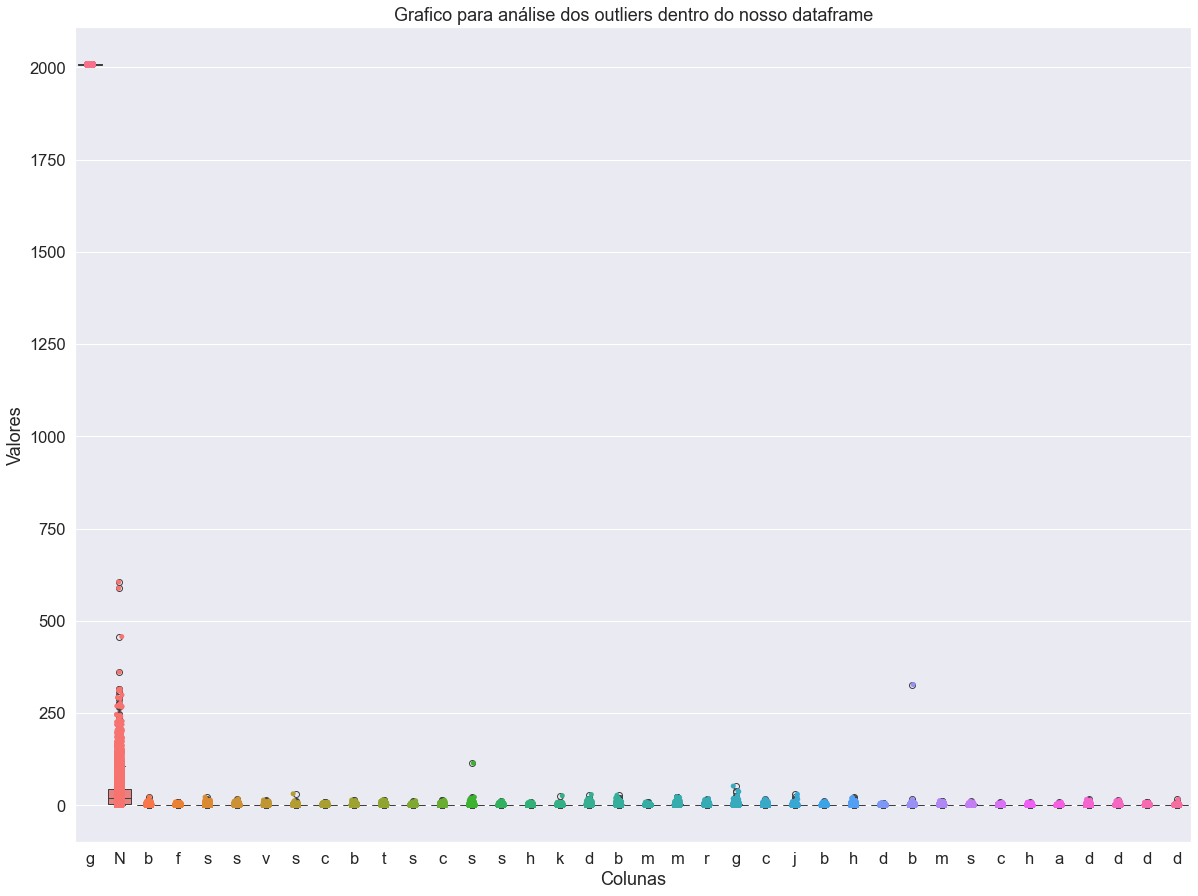

In [74]:
## Grafico box plot para análisar os outliers
fig, ax = plt.subplots(figsize=(20, 15))

sns.boxplot(data=df)
sns.stripplot(data=df)
plt.xticks(ticks=range(len(df.columns)), labels=col_abrve)
plt.xlabel("Colunas")
plt.ylabel("Valores")
plt.title("Grafico para análise dos outliers dentro do nosso dataframe")
plt.show()

So para ver qual coluna se destaca com mais outliers. Podemos notar que e a coluna N (NumberOffriends) que e o numero de contatos nas redes sociais, e como não temos nenhuma NaN podemos passar para geração dos clusters.

## 2. Geração dos clusters
--------------------
## 2.1. K-Means
--------------------

In [75]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans
import plotly.express as px

In [76]:
# Criação do modelo KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajuste do modelo e predição dos clusters
df["cluster_kmeans"] = kmeans.fit_predict(df)

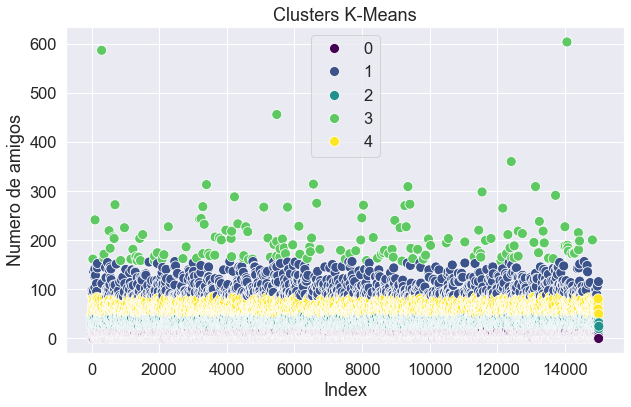

In [85]:
# Scatter plot com seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df.index,
    y="NumberOffriends",
    hue="cluster_kmeans",
    data=df,
    palette="viridis",
    s=100
)

plt.title("Clusters K-Means")
plt.xlabel("Index")
plt.ylabel("Numero de amigos")
plt.legend()
plt.show()

In [100]:
inercia_knn = kmeans.inertia_

In [101]:
print("Inércia:", inercia_knn)

Inércia: 2134898.7666577273


In [86]:
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score, normalized_mutual_info_score

In [94]:
X = df.drop(columns=["cluster_kmeans"], axis=1)
Y = kmeans.labels_
silhouette_avg = silhouette_score(X, Y)

In [95]:
print(silhouette_avg)

0.5357247529988065


## 2.2. Aglomerativo
--------------------

In [102]:
from sklearn.cluster import AgglomerativeClustering

In [106]:
agg = AgglomerativeClustering(n_clusters=5)

In [109]:
df["cluster_agg"] = agg.fit_predict(X)

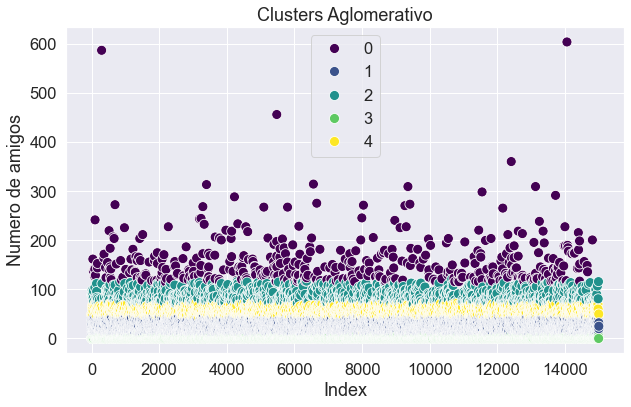

In [111]:
# Scatter plot com seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df.index,
    y="NumberOffriends",
    hue="cluster_agg",
    data=df,
    palette="viridis",
    s=100
)

plt.title("Clusters Aglomerativo")
plt.xlabel("Index")
plt.ylabel("Numero de amigos")
plt.legend()
plt.show()

In [113]:
Y = agg.labels_

In [114]:
silhouette_avg = silhouette_score(X, Y)


In [115]:
print(silhouette_avg)

0.4352214421946061


## 2.3. DBSCAN
--------------------

In [119]:
from sklearn.cluster import DBSCAN


In [120]:
dbscan = DBSCAN(eps=5)

In [121]:
df["cluster_dbs"] = dbscan.fit_predict(X)

In [122]:
Y = dbscan.labels_

In [123]:
silhouette_avg = silhouette_score(X, Y)


In [124]:
print(silhouette_avg)

-0.25170173523347367


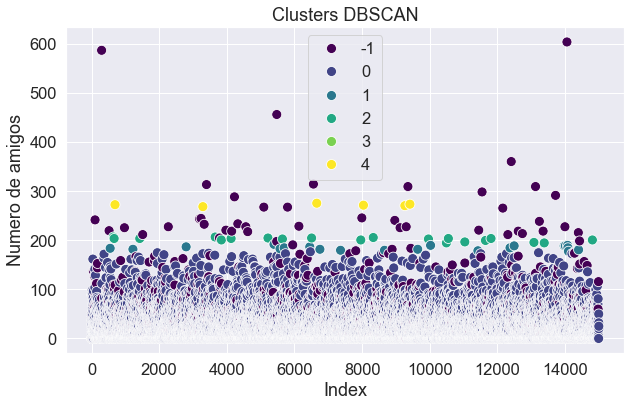

In [125]:
# Scatter plot com seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df.index,
    y="NumberOffriends",
    hue="cluster_dbs",
    data=df,
    palette="viridis",
    s=100
)

plt.title("Clusters DBSCAN")
plt.xlabel("Index")
plt.ylabel("Numero de amigos")
plt.legend()
plt.show()

## 3 Há diferença nos agrupamentos?
---------------------------

Sim o melhor cluster foi o Kmeans onde sua media do (silhouette_avg) foi mais proxima de 1 assim podemos concluir que ele foi o melhor como cluster para esses dados.

## 4. Visualização
Nas vizualizações também conseguimos notar que o DBASCAN as classes estão muito juntas nos Scaltter plot isso é um mau indicativo para cluster.

---------------------------
## 4.1. PCA
---------------------------

In [135]:
from sklearn.decomposition import PCA
import seaborn as sns

In [127]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [128]:
X_pca

array([[-29.84199638,  -0.21596566],
       [ 19.16025361,  -0.18948506],
       [ 11.16661288,   0.42928953],
       ...,
       [  2.15987822,  -0.2327328 ],
       [ -9.8414119 ,  -0.21801139],
       [ -4.82438278,  -0.08811332]])

In [129]:
# Percentual da variabilidade explicado
explained_variance = pca.explained_variance_ratio_
total_explained_variance = explained_variance.sum()
print(f"Percentual da variabilidade explicado com duas componentes: {total_explained_variance * 100:.2f}%")

Percentual da variabilidade explicado com duas componentes: 98.47%


Ou seja nossos dados com essas duas variaveis conseguimos explicar 98% dos dados

In [130]:
# Adicionar as componentes principais ao DataFrame
df["PCA1"] = X_pca[:, 0]
df["PCA2"] = X_pca[:, 1]

In [139]:
# Criação do modelo KMeans
kmeans = KMeans(n_clusters=5, random_state=42)

# Ajuste do modelo e predição dos clusters
df["cluster_kmeans_pca"] = kmeans.fit_predict(X_pca)

In [141]:
print(silhouette_score(X_pca, kmeans.labels_))

0.6063606465868772


In [142]:
kmeans.inertia_

1842912.8553868134

## 4.2. Gráfico
---------------------------

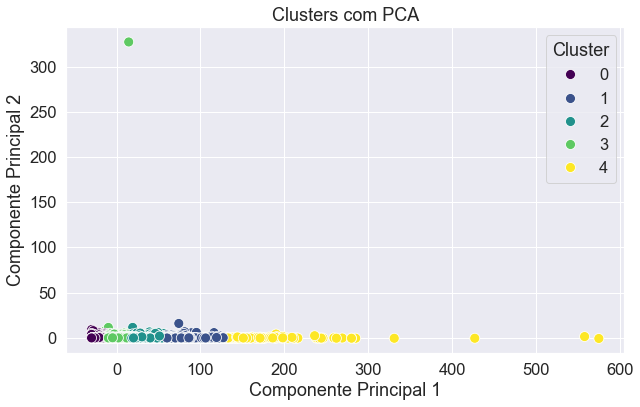

In [140]:
# Construir o gráfico de pontos
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="cluster_kmeans_pca", palette="viridis", data=df, s=100
)
plt.title('Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()

Podemos notar que aumento silhouette_score pouca coisa mais proximo de 1,  e que nossa inercia diminuiu bastante referente aos nossos dados.